In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'



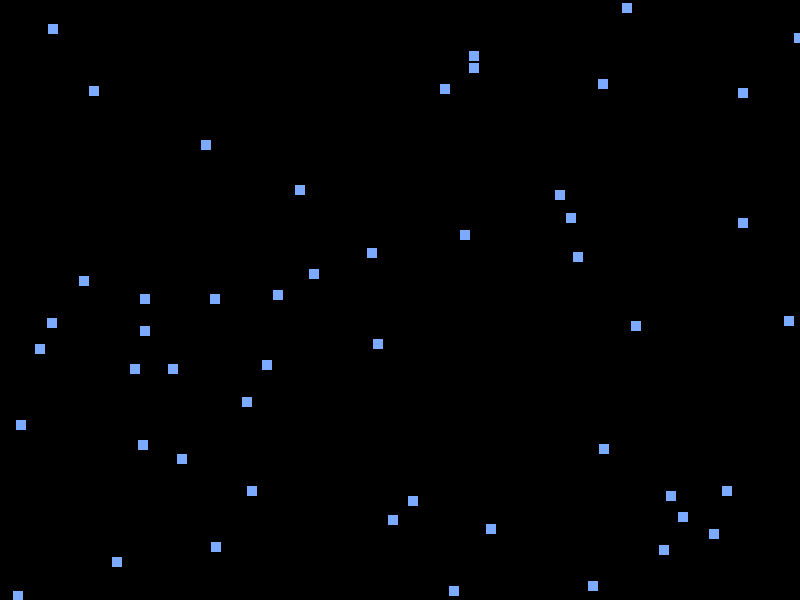

In [ ]:
# Task 1
import random as rd
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(0.17, 0.23, 0.345)
gl.glPointSize(10)

gl.glBegin(gl.GL_POINTS)
for i in range(50):
  x = rd.uniform(-1.0, 1.0)
  y = rd.uniform(-1.0, 1.0)
  gl.glVertex2f(x, y)
gl.glEnd()


img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)



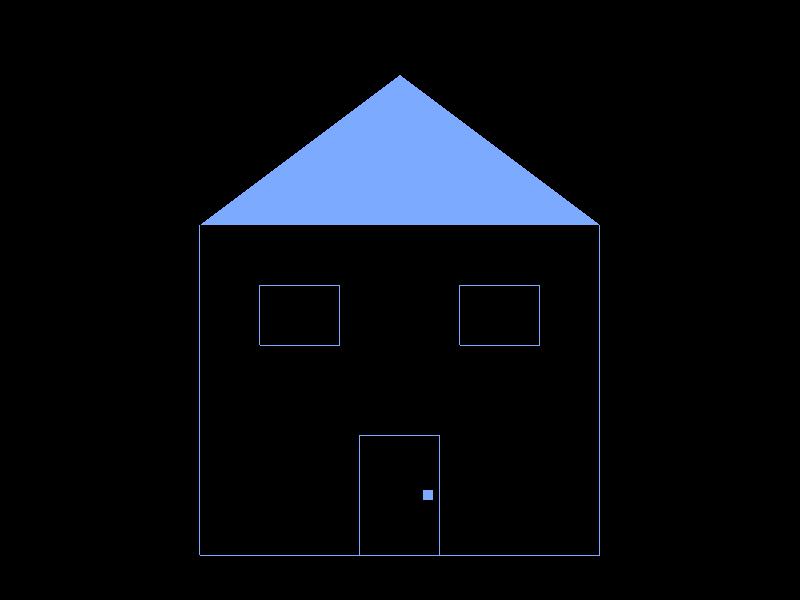

In [ ]:
# Task 2
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(0.17, 0.23, 0.345)

# Roof
gl.glBegin(gl.GL_TRIANGLES)
# Left slant
gl.glVertex2f(-0.5, 0.25)
# Top Height
gl.glVertex2f(0.0, 0.75)
# Right slant
gl.glVertex2f(0.5, 0.25)
gl.glEnd()

gl.glBegin(gl.GL_LINES)
# Borders
# Left
gl.glVertex2f(-0.5, 0.25)
gl.glVertex2f(-0.5, -0.85)
# Right
gl.glVertex2f(0.5, 0.25)
gl.glVertex2f(0.5, -0.85)
# Bottom
gl.glVertex2f(-0.5, -0.85)
gl.glVertex2f(0.5, -0.85)

# Left Window
# Top
gl.glVertex2f(-0.35, 0.05)
gl.glVertex2f(-0.15, 0.05)
# Bottom
gl.glVertex2f(-0.35, -0.15)
gl.glVertex2f(-0.15, -0.15)
# Left
gl.glVertex2f(-0.35, 0.05)
gl.glVertex2f(-0.35, -0.15)
# Right
gl.glVertex2f(-0.15, 0.05)
gl.glVertex2f(-0.15, -0.15)

# Right Window
# Top
gl.glVertex2f(0.35, 0.05)
gl.glVertex2f(0.15, 0.05)
# Bottom
gl.glVertex2f(0.35, -0.15)
gl.glVertex2f(0.15, -0.15)
# Left
gl.glVertex2f(0.35, 0.05)
gl.glVertex2f(0.35, -0.15)
# Right
gl.glVertex2f(0.15, 0.05)
gl.glVertex2f(0.15, -0.15)

# Door
#Right
gl.glVertex2f(0.1, -0.85)
gl.glVertex2f(0.1, -0.45)
# Left
gl.glVertex2f(-0.1, -0.85)
gl.glVertex2f(-0.1, -0.45)
# Top
gl.glVertex2f(-0.1, -0.45)
gl.glVertex2f(0.1, -0.45)
gl.glEnd()

# Door knob
gl.glBegin(gl.GL_POINTS)
gl.glVertex2f(0.07, -0.65)
gl.glEnd()

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)